# Project III

##### Contributors: Armand Sandvik (245472), Eirik Søyland (244724) and Jørund Eldøy (274351)

### Abstract

### Introduction

### Topic 1)

#### Task 0:

In [6]:
from project_3 import Monte_Carlo_simulations

monte_carlo = Monte_Carlo_simulations([-1, -1, -1], [1, 1, 1])

#### Task 1:

In [7]:
point = monte_carlo.place_random_point()
print(point)

[ 0.08855117 -0.71976751 -0.70538834]


#### Task 2:

In [8]:
center, radius = monte_carlo.place_random_sphere()
print(f"Center of the sphere has x, y, z coordinates: {center}, and radius {radius}")

Center of the sphere has x, y, z coordinates: [ 0.72126523  0.03780804 -0.10218207], and radius 0.16193386848484362


#### Task 3:

In [9]:
print(monte_carlo.in_sphere(point, center, radius))

False


#### Task 4:

The estimated volume of the sphere is (0.011555555555555555 ± 0.0062771331532252535) for 95% CI. 
And we can compare to the analytical expression which gives us 0.01778695811024459. 
There were 13 hits out of 9000 points.


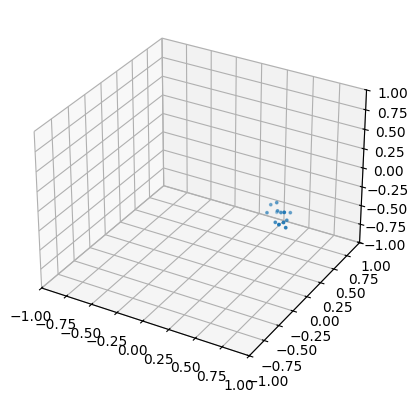

In [10]:
n_points = 9000
points_inside, fraction = monte_carlo.calculate_fraction_of_points(n_points, center, radius)

est_volume, std_err = monte_carlo.calculate_accuracy(n_points, fraction)
true_volume = monte_carlo.calculate_analytical(radius)

print(f"The estimated volume of the sphere is ({est_volume} ± {1.96 * std_err}) for 95% CI. \nAnd we can compare to the analytical expression which gives us {true_volume}. \nThere were {len(points_inside)} hits out of {n_points} points.")

monte_carlo.plot_3d(points_inside)


#### Task 5:

$$ V_{sphere} = \frac{4}{3} \cdot \pi \cdot r^3$$
$$\pi = \frac{V_{sphere}}{\frac{4}{3} \cdot r^3}$$
$$\pi = \frac{3 \cdot V_{sphere}}{4 \cdot r^3}$$
$$ V_{sphere} = Volume \, of \, simulation \, area \cdot \frac{Number \, of \, hits}{Number \, of \, randomly \, generated \, points} $$

In [11]:
print(monte_carlo.estimate_pi(n_points, len(points_inside), radius))

2.040981274958591


#### Task 6:

In [12]:
spheres = []
for i in range(10):
    center, radius = monte_carlo.place_random_sphere()
    spheres.append([center, radius])
    print(f"Center of the sphere {i+1} has x, y, z coordinates: {center}, and radius {radius}")

Center of the sphere 1 has x, y, z coordinates: [ 0.09780026  0.23395664 -0.92154161], and radius 0.008442455935439594
Center of the sphere 2 has x, y, z coordinates: [-0.58605776  0.64046682  0.60533005], and radius 0.1199984734896534
Center of the sphere 3 has x, y, z coordinates: [ 0.49587531 -0.55159799  0.20995495], and radius 0.17462956732635135
Center of the sphere 4 has x, y, z coordinates: [-0.50860783 -0.86059343 -0.49718527], and radius 0.00878767308850967
Center of the sphere 5 has x, y, z coordinates: [-0.32790591 -0.92139862  0.64435596], and radius 0.07369574261877565
Center of the sphere 6 has x, y, z coordinates: [0.24830707 0.91114055 0.11050868], and radius 0.05690704822267046
Center of the sphere 7 has x, y, z coordinates: [-0.1173618   0.08836866  0.29273869], and radius 0.10448183871272494
Center of the sphere 8 has x, y, z coordinates: [-0.58784268  0.48591166 -0.60749792], and radius 0.03213678932768915
Center of the sphere 9 has x, y, z coordinates: [ 0.3885765

#### Task 7:

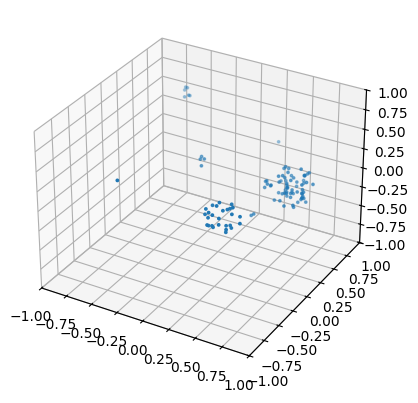

In [13]:
import numpy as np

accumulated_hits, accumulated_frac = [], []
for _ in range(n_points):
    point = monte_carlo.place_random_point()
    for sphere in spheres:
        center, radius = sphere[0], sphere[1]
        if monte_carlo.in_sphere(point, center, radius):
            accumulated_hits.append(point)
            break

monte_carlo.plot_3d(np.array(accumulated_hits))

In [14]:
fraction = len(accumulated_hits) / n_points
est_volume, std_err = monte_carlo.calculate_accuracy(n_points, fraction)

accumulated_volume = []
for sphere in spheres:
    center, radius = sphere[0], sphere[1]
    accumulated_volume.append(monte_carlo.calculate_analytical(radius))

print(f"The estimated volume of the spheres is ({est_volume} ± {1.96 * std_err}) for 95% CI. \nAnd we can compare to the analytical expression which gives us {sum(accumulated_volume)}. \nThere were {len(accumulated_hits)} hits out of {n_points} points.")

The estimated volume of the spheres is (0.0951111111111111 ± 0.017914237564586412) for 95% CI. 
And we can compare to the analytical expression which gives us 0.09561001042235902. 
There were 107 hits out of 9000 points.


At some points the ``accumulated_volume`` will go larger than ``est_volume`` ± ``1.96 * std_err`` because we don't count for overlapping spheres in our volume calculation. So in some simulations there will be several overlapping spheres that gets accounted for in the estimated volume, but not in the analytical volume accumulations.

#### Task 8:

In [15]:
dna = []
with open("dna_coords.txt", "r") as f:
    for line in f:
        line = line.split()
        coordinates = [float(line[1]), float(line[2]), float(line[3])]
        radius = monte_carlo.translate_periodic_table(line[0])
        dna.append([coordinates, radius])

We have made an array with grouped coordinates and radius of each atom in the dna-strand. Where the first element is a numpy array of (x, y, z)-coordinates and the second element is the atomic radius.

#### Task 9:

In [16]:
monte_carlo.change_boundaries(dna)
print(monte_carlo.min_xyz, monte_carlo.max_xyz)

[-54.38074 -24.29082 -16.51192] [-24.57274   9.06218  16.41708]


We modify our boundaries to dynamically change the x-, y- and z-min and max-values according to the DNA-coordinates with it's respective radius and a buffer (5Å) to have it centered it the figure. 

#### Task 10:

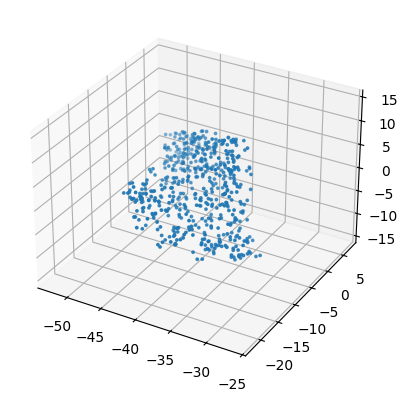

In [17]:
n_points = 10000
accumulated_hits, accumulated_frac = [], []
for _ in range(n_points):
    point = monte_carlo.place_random_point()
    for atom in dna:
        coordinate, radius = atom[0], atom[1]
        if monte_carlo.in_sphere(point, coordinate, radius):
            accumulated_hits.append(point)
            break

monte_carlo.plot_3d(np.array(accumulated_hits))


In [18]:
fraction = len(accumulated_hits) / n_points
est_volume, std_err = monte_carlo.calculate_accuracy(n_points, fraction)

accumulated_volume = []
for atom in dna:
    radius = atom[1]
    accumulated_volume.append(monte_carlo.calculate_analytical(radius))

print(f"The estimated volume of the spheres is ({est_volume} ± {1.96 * std_err}) for 95% CI. \nAnd we can compare to the analytical expression which gives us {sum(accumulated_volume)}. \nThere were {len(accumulated_hits)} hits out of {n_points} points.")

The estimated volume of the spheres is (1833.3032575253765 ± 147.5306871169344) for 95% CI. 
And we can compare to the analytical expression which gives us 3672.2768725392457. 
There were 560 hits out of 10000 points.


### Topic 2)

#### Task 1:

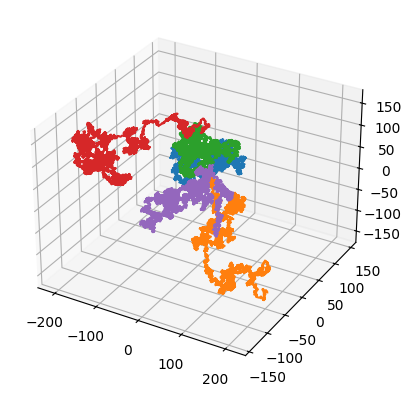

In [19]:
import matplotlib.pyplot as plt

random_walker = Monte_Carlo_simulations([-100, -100, -100], [100, 100, 100])
set_of_random_walkers = random_walker.random_walker(10000, 5)

ax = plt.figure().add_subplot(projection='3d')
for walker in set_of_random_walkers:
    ax.plot(np.array(walker[0]), np.array(walker[1]), np.array(walker[2]))

#### Task 2:

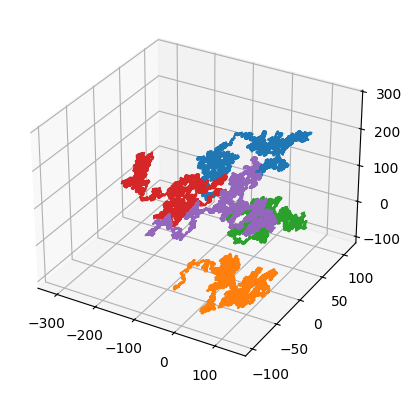

In [20]:
set_of_random_walkers = random_walker.fast_random_walker(10000, 5)

ax = plt.figure().add_subplot(projection='3d')
for walker in set_of_random_walkers:
    ax.plot(np.array(walker[0]), np.array(walker[1]), np.array(walker[2]))

#### Task 3:

We are interested in finding the accessible volume around the DNA using random walker(s). The way we do this is to divide the simulation box into many imaginary smaller boxes. We want to assign the walker some small, but significant size so that the simulation will not need to check every decimal up to near infinity amount of decimals to have covered a satisfactory amount of the accessible area. So we can e.g. give the walker a size of 1Å radius. Then we will need to check if our walker ever collides with the DNA, or more specifically that the radius of our walker doesn't overlap with the radius of the DNA.

So our walker will take a step and check if it collides with any of the DNA atoms and then has two outcomes:
1) It either has no collision and can save the coordinate to an array (which later will be used to calculate the accessible volume)
2) Has a overlap with one of the atoms and therefore has to take a step in another direction instead

After our walker(s) gone a satisfactory amount of steps we want to filter out uniques coordinates from our list of ``no_collision_coords``. Then we can multiply the ``len(no_collision_coords_unique)`` with typically the step length, where each step will represent one cubed Ångstrøm in space, and create a hypotethical miniature box which we can assure is safe from collision. So then our answer will be the accessible area.

<img src="static/images/random_walker_strategy.png" width="">

#### Task 4:

To test our strategy we want to first make a small, empty simulation box that has a known volume. We send in a random walker and see if it is able to add up the volume. We can then compare the volume gathered by the walker(s) to the known volume of the box. If this is within an meaningful range we can then proceed to test 2:

Now we make the same simulation box, with a known volume, but this time with a single sphere inside. The volume of the sphere is known to us, so that the "accessible" volume is known to us beforehand. Now we deploy the walker in our simulation to see if it can add up the volume except the volume of the sphere. If the walker adds up the accessible volume to an meaningful range, we can assume our strategy will work in a larger scale as well.

#### Task 5:

34559 32737.558170096007


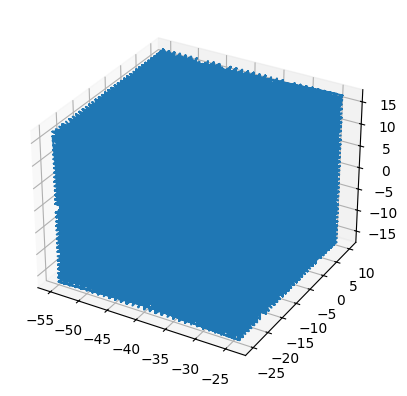

In [ ]:
from project_3 import accessible_volume

ac_volume = accessible_volume(dna, 0.5)
init = np.array((np.ceil(ac_volume.min_xyz[0]), np.ceil(ac_volume.min_xyz[1]), np.ceil(ac_volume.min_xyz[2])))
path = ac_volume.random_walker_with_no_collison(init, 80000)
unique = np.unique(path, axis=0)
# for i in unique:
#     print(i)
volume_sim_area = ((ac_volume.max_xyz[0]-ac_volume.min_xyz[0]) * (ac_volume.max_xyz[1]-ac_volume.min_xyz[1]) * (ac_volume.max_xyz[2]-ac_volume.min_xyz[2]))
print(len(unique), volume_sim_area)

ax = plt.figure().add_subplot(projection='3d')
ax.plot(path[:, 0], path[:, 1], path[: ,2])


[-54.38074 -24.29082 -16.51192] [-24.57274   9.06218  16.41708]


### Summary/conclusion

### Self-reflection

### Bibliography